# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**

Due Date : 10/14 (October 14th), 11:59 PM EST

## Name: Liwen Zhu

## UNI: lz2512

## The Dataset

### Acknowledgements

Big Thanks to https://www.superdatascience.com/pages/deep-learning

Banner Photo by Sharon McCutcheon on Unsplash

### Description

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [2]:
## YOUR CODE HERE
bank = pd.read_csv("HW2_dataset.csv")

**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping)**

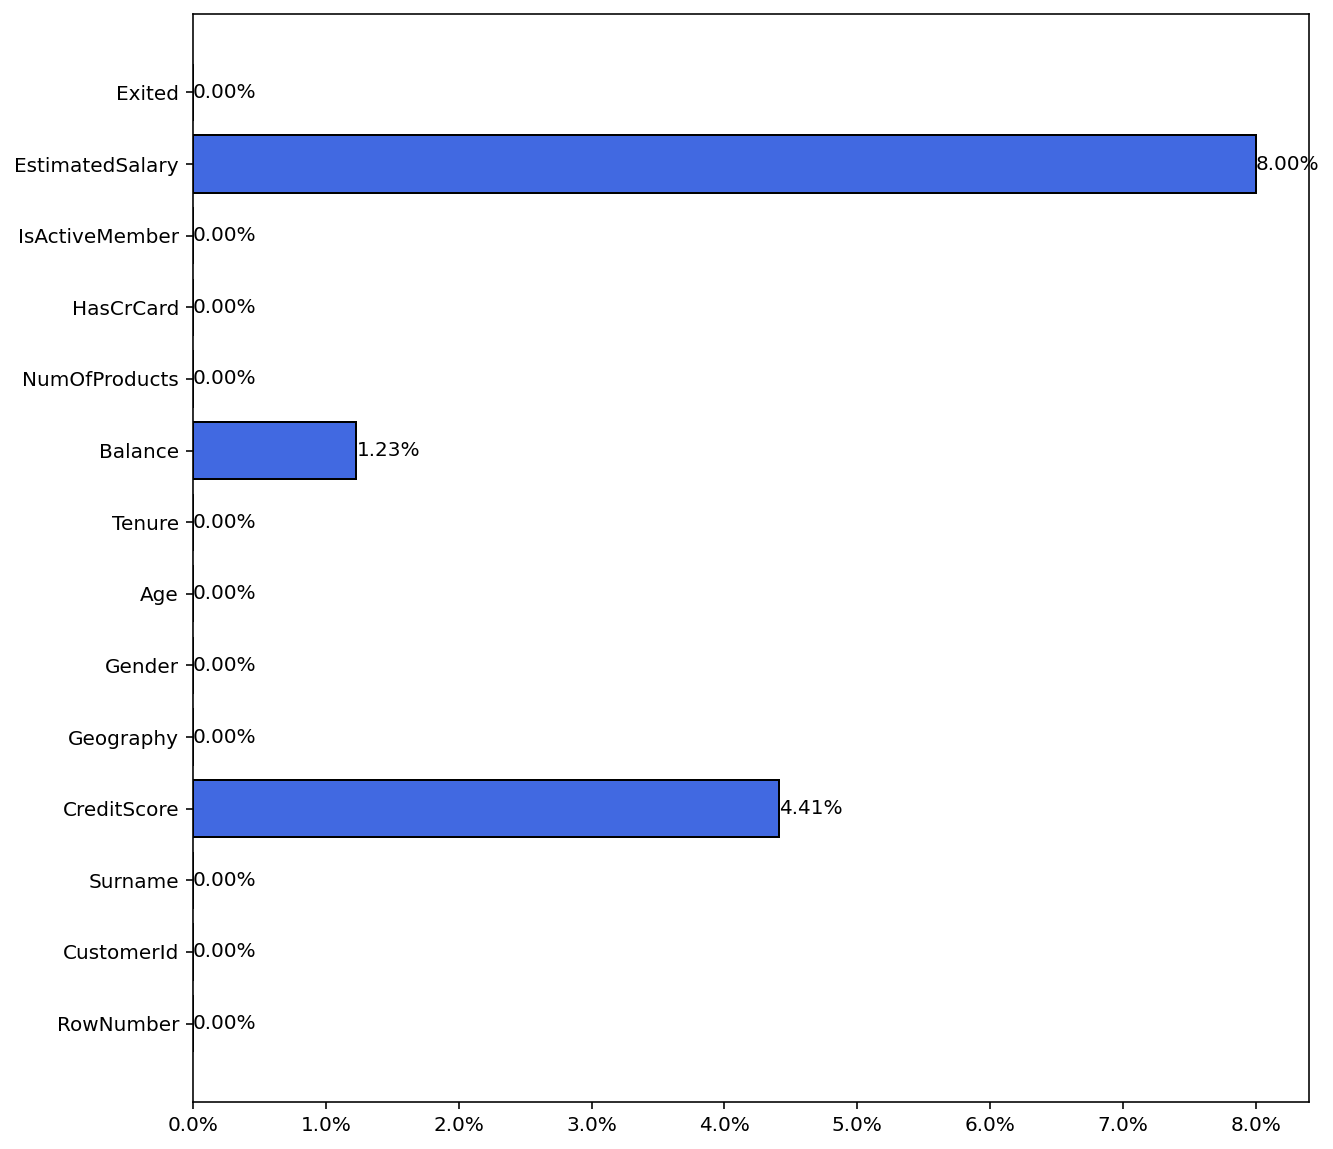

I will drop the RowNumber, CustomerId, and surname columns because they have no relationship with exiting or not. 


In [3]:
## YOUR CODE HERE
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,10),dpi=144)
label = bank.columns,bank.isnull().sum()*100/len(bank)
bar = ax.barh(bank.columns,bank.isnull().sum()*100/len(bank), color='royalblue',edgecolor = 'black')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.bar_label(bar,labels=['%.2f%%'%l for l in label[1][:]])
plt.show()
print("I will drop the RowNumber, CustomerId, and surname columns because they have no relationship with exiting \
or not. ")

**1.3: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**

**Clarification with Example below : Here `flWinner` is the Target Variable and `descMapName` is a categorical feature. You are required to make such side-by-side bar plot for each categorical feature with repect to it's class distribution with the target feature for our dataset.**

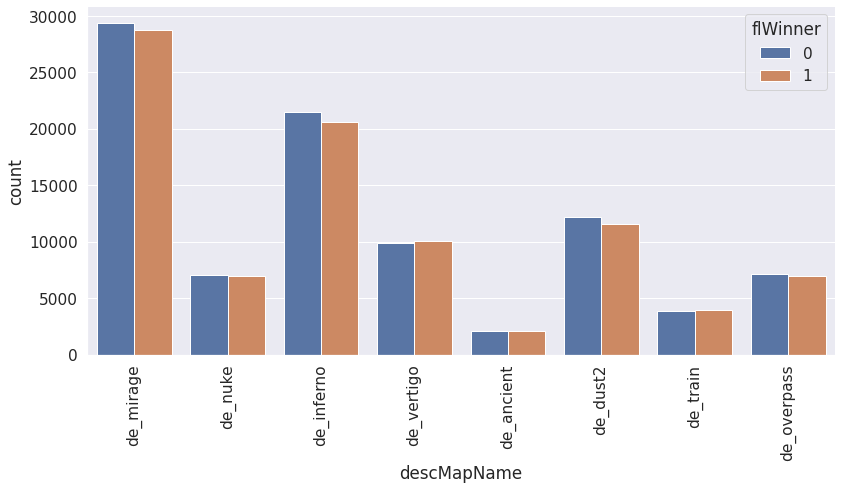

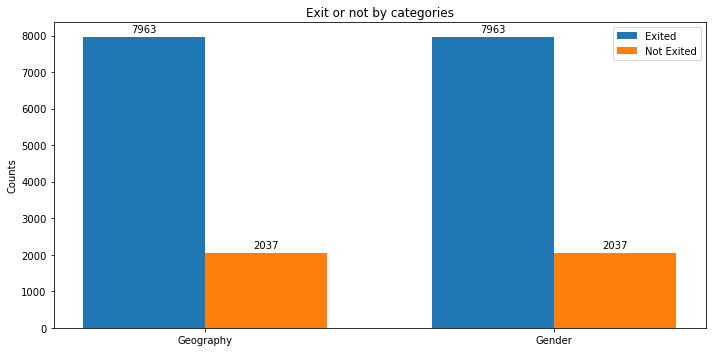

In [4]:
## YOUR CODE HERE
categorical = ['Geography','Gender']
exit = bank[['Geography','Gender','Exited']].groupby('Exited').count()
fig, ax = plt.subplots(figsize=(10,5))
label = exit.columns
ind = np.arange(len(exit.columns))  # the x locations for the groups
width = 0.35       # the width of the bars
exited = ax.bar(ind-width/2, np.array(exit[0:1]).reshape(2,),width, label='Exited')
not_exited = ax.bar(ind+width/2, np.array(exit[1:2]).reshape(2,), width, label='Not Exited')

ax.set_ylabel('Counts')
ax.set_title('Exit or not by categories')
ax.set_xticks(ind, label)
ax.legend()

ax.bar_label(exited, padding=3)
ax.bar_label(not_exited, padding=3)
fig.tight_layout()
plt.show()

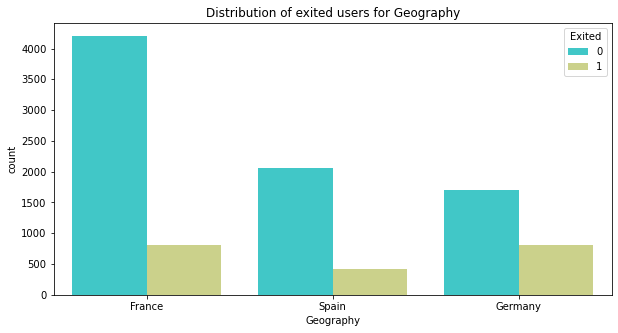

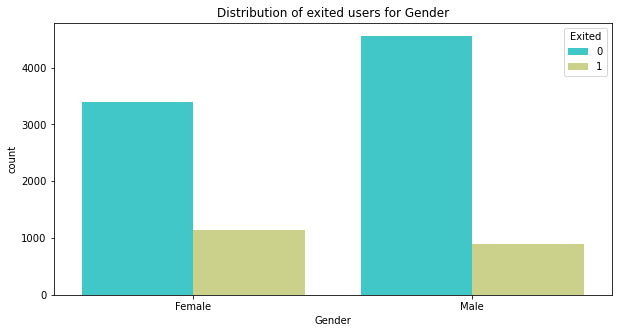

In [5]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(bank[['CreditScore','Balance','EstimatedSalary']])
bank[['CreditScore','Balance','EstimatedSalary']]= imp_mean.transform(bank[['CreditScore','Balance','EstimatedSalary']])
for c in categorical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=c,data=bank,palette='rainbow',hue='Exited')
    plt.title(f"Distribution of exited users for {c}")


1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?

In [6]:
## YOUR CODE HERE
from sklearn.model_selection import train_test_split
bank_X = bank.drop(columns=['RowNumber','CustomerId','Surname','Exited'])
bank_y = bank['Exited']
bank_X_dev, bank_X_test, bank_y_dev, bank_y_test = train_test_split(bank_X, bank_y, test_size=0.33, random_state=42, stratify=bank_y)
bank_X_train, bank_X_val, bank_y_train, bank_y_val = train_test_split(bank_X_dev, bank_y_dev, test_size=0.33, random_state=42, stratify=bank_y_dev)
print("I choose stratified spliting because the ration of target value is imbalanced.")

I choose stratified spliting because the ration of target value is imbalanced.


**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

In [7]:
## YOUR CODE HERE
# from sklearn.preprocessing import OrdinalEncoder
# oe = OrdinalEncoder()
# for c in categorical:
#     bank_X_train[c] = oe.fit_transform(bank_X_train[c].to_numpy().reshape(-1,1))
#     bank_X_val[c] = oe.fit_transform(bank_X_val[c].to_numpy().reshape(-1,1))
#     bank_X_test[c] = oe.fit_transform(bank_X_test[c].to_numpy().reshape(-1,1))

# bank_X_train

from sklearn.preprocessing import OneHotEncoder    
ohe_geo = OneHotEncoder()
ohe_gen = OneHotEncoder()

geo_transformed_train = ohe_geo.fit_transform(bank_X_train[["Geography"]])
bank_X_train[["France","Spain","Germany"]] = geo_transformed_train.toarray()
gen_transformed_train = ohe_gen.fit_transform(bank_X_train[["Gender"]])
bank_X_train[["Female","Male"]] = gen_transformed_train.toarray()
bank_X_train.drop(columns = ["Geography","Gender"],axis=1,inplace = True)
    
geo_transformed_val = ohe_geo.fit_transform(bank_X_val[["Geography"]])
bank_X_val[["France","Spain","Germany"]] = geo_transformed_val.toarray()
gen_transformed_val = ohe_gen.fit_transform(bank_X_val[["Gender"]])
bank_X_val[["Female","Male"]] = gen_transformed_val.toarray()
bank_X_val.drop(columns = ["Geography","Gender"],axis=1,inplace = True)
    
geo_transformed_test = ohe_geo.fit_transform(bank_X_test[["Geography"]])
bank_X_test[["France","Spain","Germany"]] = geo_transformed_test.toarray()
gen_transformed_test = ohe_gen.fit_transform(bank_X_test[["Gender"]])
bank_X_test[["Female","Male"]] = gen_transformed_test.toarray()
bank_X_test.drop(columns = ["Geography","Gender"],axis=1,inplace = True)

print("We do not fneed to apply scaling because the decision tree will split the data in to different sections \
with a certain line. Even after scaling, the separted porportion is still the same, so there is no need to scale.")

We do not fneed to apply scaling because the decision tree will split the data in to different sections with a certain line. Even after scaling, the separted porportion is still the same, so there is no need to scale.


**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

In [8]:
## YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
dtc = DecisionTreeClassifier()
dtc.fit(bank_X_train,bank_y_train)
bank_y_val_pred = dtc.predict(bank_X_val)
bank_y_test_pred = dtc.predict(bank_X_test)
print(f"For the development set the recall score is {recall_score(bank_y_val,bank_y_val_pred,pos_label=1)}, \
the precision score is {precision_score(bank_y_val,bank_y_val_pred,pos_label=1)}, \
the F1-Score is {f1_score(bank_y_val,bank_y_val_pred,pos_label=1)}.")
print(f"For the test set the recall score is {recall_score(bank_y_test,bank_y_test_pred,pos_label=1)}, \
the precision score is {precision_score(bank_y_test,bank_y_test_pred,pos_label=1)}, \
the F1-Score is {f1_score(bank_y_test,bank_y_test_pred,pos_label=1)}.")
print("Precision, Recall, and F1 are metrics relevant to the decision tree bceause they are better for imbalance datasets.")

For the development set the recall score is 0.49777777777777776, the precision score is 0.4890829694323144, the F1-Score is 0.4933920704845815.
For the test set the recall score is 0.49851190476190477, the precision score is 0.475177304964539, the F1-Score is 0.486564996368918.
Precision, Recall, and F1 are metrics relevant to the decision tree bceause they are better for imbalance datasets.


**1.7: Visualize the trained tree until the max_depth 8**

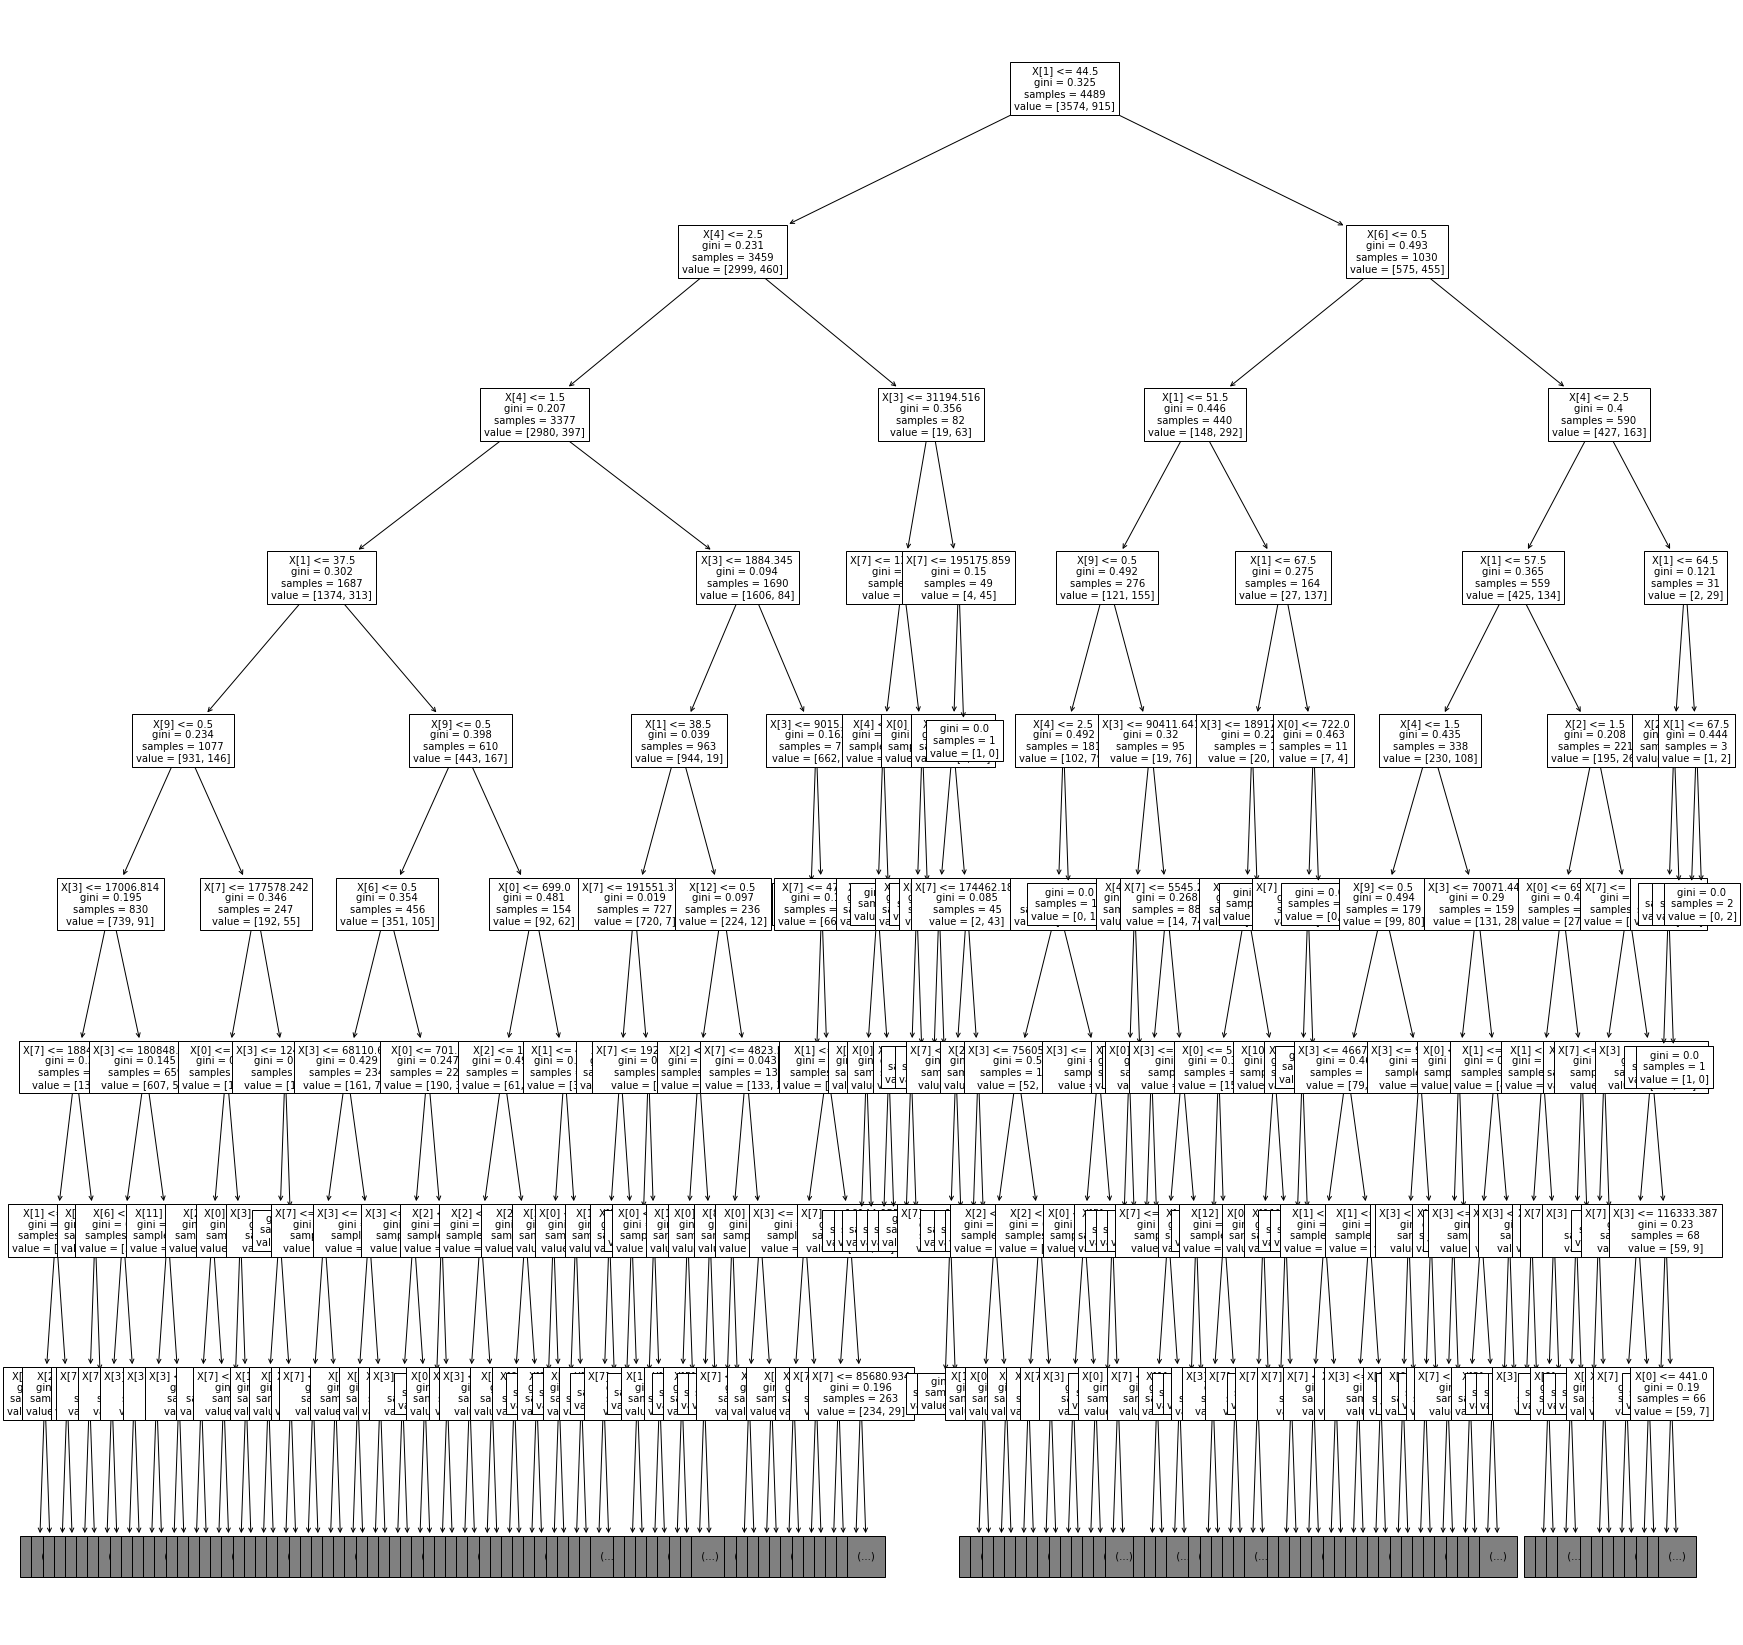

In [9]:
## YOUR CODE HERE
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(dtc,max_depth=8, fontsize=10)
plt.savefig('tree_high_dpi', dpi=144)

**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

In [10]:
## YOUR CODE HERE
# cost complexity pruning
cc = dtc.cost_complexity_pruning_path(bank_X_train,bank_y_train)
alphas = cc.ccp_alphas
impurities = cc.impurities
max_a = alphas[0]
accuracy = -1
for a in alphas:
    dt = DecisionTreeClassifier(random_state=0,ccp_alpha = a)
    dt.fit(bank_X_train,bank_y_train)
    score = precision_score(bank_y_val,dt.predict(bank_X_val))
    if accuracy < score:
        accuracy = score
        max_a = a
dt_best = DecisionTreeClassifier(ccp_alpha = max_a)
dt_best.fit(bank_X_train,bank_y_train)
print(f"The precision score on the development set is {precision_score(bank_y_val,dt_best.predict(bank_X_val),pos_label=1)}.")
print(f"The precision score on the test set is {precision_score(bank_y_test,dt_best.predict(bank_X_test),pos_label=1)}.")
print("The precision score for the development set and test set after pruning is higher than before.")

The precision score on the development set is 0.8074866310160428.
The precision score on the test set is 0.8237410071942446.
The precision score for the development set and test set after pruning is higher than before.


/Users/alanzhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

/Users/alanzhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


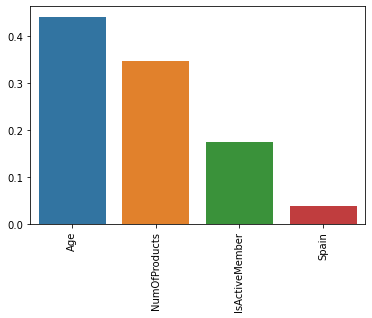

The top 3 most important features are Age, NumofProducts, IsActivemembet.


In [11]:
## YOUR CODE HERE
feat_imps = list(zip(bank_X_train.columns,dt_best.feature_importances_))
feats,imps = zip(*(sorted(list(filter(lambda x:x[1]!=0,feat_imps)),key=lambda x:x[1], reverse = True)))
ax = sns.barplot(list(feats),list(imps))
ax.tick_params(axis='x',rotation=90)
plt.show()
print("The top 3 most important features are Age, NumofProducts, IsActivemembet.")

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [12]:
## YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(bank_X_train,bank_y_train)
rfc_predict = rfc.predict(bank_X_test)
print(f"The precision score on the test set is {precision_score(bank_y_test,rfc.predict(bank_X_test),pos_label=1)}.")
print(f"The score is higher than in 1.6 for test set which is {precision_score(bank_y_test,bank_y_test_pred,pos_label=1)}.")

The precision score on the test set is 0.7603092783505154.
The score is higher than in 1.6 for test set which is 0.475177304964539.


**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [13]:
## YOUR CODE HERE
# rfc.get_params()["min_samples_split"]==2 and rfc.get_params()["max_depth"]==None
pure = True
for i in range(len(rfc.estimators_)):

    n_nodes = rfc.estimators_[i].tree_.node_count
    children_left = rfc.estimators_[i].tree_.children_left
    children_right = rfc.estimators_[i].tree_.children_right
    impurity = rfc.estimators_[i].tree_.impurity

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]
    while len(stack) > 0:
        node_id, depth = stack.pop()
        node_depth[node_id] = depth
        is_split_node = children_left[node_id] != children_right[node_id]
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True
            if (impurity[node_id]!=0):
                pure = False
                break
                
print(pure)
print("All trees in the trained random forest model have pure leaves. I iterate through every leave \
of every tree in the forst and check their impurity. If the impurity is not equal to 0, the leaf is not pure, since \
a non-zero impurity implies the leave has more than one category.")

True
All trees in the trained random forest model have pure leaves. I iterate through every leave of every tree in the forst and check their impurity. If the impurity is not equal to 0, the leaf is not pure, since a non-zero impurity implies the leave has more than one category.


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [14]:
## YOUR ANSWER HERE
print("I would choose n_estimators and max_depth. The n_estimators represents the number of trees in the forest. \
Generally, the more trees in the forest, the more accurate the model is. A short tree may be not accurate \
while a tall tree may be overfitting. Thus, I would choose max_depth to find the optimal height for the tree.")

I would choose n_estimators and max_depth. The n_estimators represents the number of trees in the forest. Generally, the more trees in the forest, the more accurate the model is. A short tree may be not accurate while a tall tree may be overfitting. Thus, I would choose max_depth to find the optimal height for the tree.


**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [15]:
## YOUR ANSWER HERE
print(f"For n_estimators, I will choose 200, 300, 400, 500, and 600. For max_depth, I choose 10, 15, 20, 25, and 30. \
As the value of n_estimators increases and the other remains the same, the performance should be better. \
The default n_estimator is 100. I would like to increase the number.\
The default of max_depth is None, which sets no limits on the tree. The depth of the decision tree \
is {dtc.tree_.max_depth} in 1.6. I believe the range of depth should be around or lower than this number.")

For n_estimators, I will choose 200, 300, 400, 500, and 600. For max_depth, I choose 10, 15, 20, 25, and 30. As the value of n_estimators increases and the other remains the same, the performance should be better. The default n_estimator is 100. I would like to increase the number.The default of max_depth is None, which sets no limits on the tree. The depth of the decision tree is 29 in 1.6. I believe the range of depth should be around or lower than this number.


**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [16]:
## YOUR CODE HERE
from sklearn.model_selection import cross_val_score
ns = [200,300,400,500,600]
depths = [10,15,20,25,30]
scores = []
for i in range(5):
    rfc_choose = RandomForestClassifier(n_estimators=ns[i], max_depth = depths[i])
    rfc_choose.fit(bank_X_train,bank_y_train)
    score = cross_val_score(rfc_choose,bank_X_train,bank_y_train,cv=5)
    scores.append(np.mean(score))
best_n = ns[np.argmax(scores)]
best_depth = depths[np.argmax(scores)]
best_rfc = RandomForestClassifier(n_estimators=best_n, max_depth = best_depth)
best_rfc.fit(bank_X_train,bank_y_train)
print(f"The score of best performace is {np.max(scores)} \
with n_estimators= {best_n} and max_depth = {best_depth}. The performance is better than in Q2.1")

The score of best performace is 0.8576494774713037 with n_estimators= 300 and max_depth = 15. The performance is better than in Q2.1


**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

/Users/alanzhu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


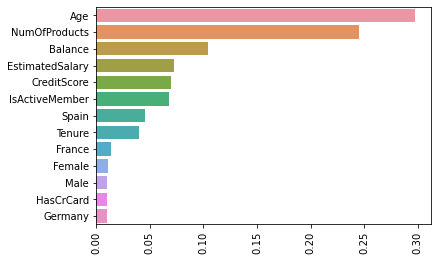

Age, NumofProducts, and Balance are the top 3 most important features. The difference compare to Q2.5 is that isActivement is replaced by Balance. I think Balance makes more sense because the performance of model in Q2.5 is higher than in Q1.9.


In [17]:
## YOUR CODE HERE
best_rfc = RandomForestClassifier(n_estimators=best_n,max_depth = 8)
best_rfc.fit(bank_X_train,bank_y_train)
feature_impors = list(zip(bank_X_train.columns,best_rfc.feature_importances_))
feats, imps = zip(*(sorted(list(filter(lambda x:x[1]!=0,feature_impors)),key=lambda x:x[1], reverse = True)))
ax = sns.barplot(list(imps),list(feats))
ax.tick_params(axis='x',rotation=90)
plt.show()
print("Age, NumofProducts, and Balance are the top 3 most important features. The difference compare to Q2.5 is that \
isActivement is replaced by Balance. I think Balance makes more sense because the performance of model in Q2.5 is \
higher than in Q1.9.")

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

In [18]:
## YOUR CODE HERE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from datetime import datetime
ns = [100,200,300,400,500]
max_iters = [100,200,300,400,500]
depths = [8,9,10,11,12]
learning_rates = [0.1,0.11,0.12,0.13,0.14]
gbr_scores = []

gbr_start = datetime.timestamp(datetime.now())
for i in range(5):
    gbr = GradientBoostingClassifier(n_estimators=ns[i], max_depth = depths[i],learning_rate = learning_rates[i])
    gbr.fit(bank_X_train,bank_y_train)
    gbr_score = cross_val_score(gbr,bank_X_train,bank_y_train,cv=5)
    gbr_scores.append(np.mean(gbr_score))
gbr_end = datetime.timestamp(datetime.now())


hgbc_scores = []
hgbc_start = datetime.timestamp(datetime.now())
for i in range(5):
    hgbc = HistGradientBoostingClassifier(max_iter=max_iters[i], max_depth = depths[i],learning_rate = learning_rates[i])
    hgbc.fit(bank_X_train,bank_y_train)
    hgbc_score = cross_val_score(hgbc,bank_X_train,bank_y_train,cv=5)
    hgbc_scores.append(np.mean(hgbc_score))
hgbc_end = datetime.timestamp(datetime.now())



gbr_best_score = np.max(gbr_scores)
hgbc_best_score = np.max(hgbc_scores)
gbr_time = datetime.fromtimestamp(gbr_end)-datetime.fromtimestamp(gbr_start)
hgbc_time = datetime.fromtimestamp(hgbc_end)-datetime.fromtimestamp(hgbc_start)
print(f"The performance of gradient boosting is {gbr_best_score} spending {gbr_time.total_seconds()} seconds")
print(f"The performance of hist gradient boosting is {hgbc_best_score} spending {hgbc_time.total_seconds()} seconds")



The performance of gradient boosting is 0.845620516793171 spending 147.24959 seconds
The performance of hist gradient boosting is 0.8487383085911215 spending 30.206573 seconds


**3.2: Train an XGBoost model by tuning 3 hyperparameters using 10 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [19]:
## YOUR CODE HERE
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
ns = [100,200,300,400,500,600,700,800,900,1000]
depths = [3,4,6,7,8,9,10,11,12,13]
learning_rates = [0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19]
xgb_scores = []
xgb_start = datetime.timestamp(datetime.now())

for i in range(10):
    xgb = XGBClassifier(n_estimators=ns[i], max_depth = depths[i],learning_rate = learning_rates[i])
    xgb.fit(bank_X_train,bank_y_train)
    xgb_score = cross_val_score(xgb,bank_X_train,bank_y_train,cv=10)
    xgb_scores.append(np.mean(xgb_score))
xgb_end = datetime.timestamp(datetime.now())
xgb_time = datetime.fromtimestamp(xgb_end)-datetime.fromtimestamp(xgb_start)

xgb_best_score = np.max(xgb_scores) 
print(f"The performance of xgboosting is {xgb_best_score} spending {xgb_time.total_seconds()} seconds. \
The xgboosting has higher score compare to 3.1 but spending more time.")

[20:52:27] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/alanzhu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[20:52:27] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:52:27] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:52:27] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

[20:52:36] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:52:37] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:52:37] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

[20:53:02] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:53:04] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:53:06] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

[20:53:48] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:53:50] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:53:53] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

[20:54:51] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:54:54] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:54:57] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

In [26]:
## YOUR ANSWER HERE
print(f"The XGBoost performs the best with a score of {xgb_best_score}, \
and Decision Tree in 1.6 with pure leaves perform the worst with a score of {precision_score(bank_y_test,bank_y_test_pred)}. \
I would choose HistGradientBoostingClassifier because it performs almost as good as XGBoost and uses much less time.")

The XGBoost performs the best with a score of 0.8567585706331531, and Decision Tree in 1.6 with pure leaves perform the worst with a score of 0.475177304964539. I would choose HistGradientBoostingClassifier because it performs almost as good as XGBoost and uses much less time.


**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

[20:55:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


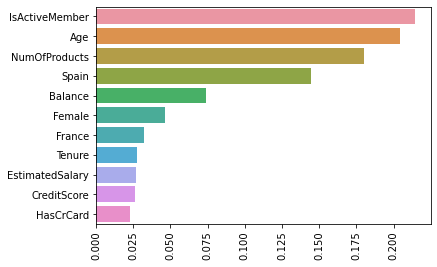

The top 3 features are isActiveMember, Age, and NumofProducts. It is same as the Decision tree but different from the Random Forest as the isActiveMember is replaced by Balance. I would choose isActiveMember, Age, and NumofProducts. The XGBoost has the highest score of performance. In the XGBoost features, Balance is the No.5 important feature, and its value is way below the top 3.


In [21]:
## YOUR CODE HERE
warnings.simplefilter(action='ignore', category=UserWarning)
best_xgb = XGBClassifier(n_estimators=ns[np.argmax(xgb_scores)], max_depth = depths[np.argmax(xgb_scores)],learning_rate = learning_rates[np.argmax(xgb_scores)])
best_xgb.fit(bank_X_train,bank_y_train)
feature_impors = list(zip(bank_X_train.columns,best_xgb.feature_importances_))
feats, imps = zip(*(sorted(list(filter(lambda x:x[1]!=0,feature_impors)),key=lambda x:x[1], reverse = True)))
ax = sns.barplot(list(imps),list(feats))
ax.tick_params(axis='x',rotation=90)
plt.show()
print("The top 3 features are isActiveMember, Age, and NumofProducts. It is same as the Decision tree but different \
from the Random Forest as the isActiveMember is replaced by Balance. I would choose isActiveMember, Age, and NumofProducts. \
The XGBoost has the highest score of performance. In the XGBoost features, Balance is the No.5 important feature, \
and its value is way below the top 3.")

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [22]:
## YOUR CODE HERE
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
ns = [100,200,300,400,500,600,700,800,900,1000]
depths = [3,4,6,7,8,9,10,11,12,13]
learning_rates = [0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19]
xgb_scores = []
for i in range(10):
    xgb = XGBClassifier(n_estimators=ns[i], max_depth = depths[i],learning_rate = learning_rates[i])
    xgb.fit(bank_X_train[list(feats[:7])],bank_y_train)
    xgb_score = cross_val_score(xgb,bank_X_train[list(feats[:7])],bank_y_train,cv=10)
    xgb_scores.append(np.mean(xgb_score))

xgb_best_score = np.max(xgb_scores) 
print(f"The performance of xgboosting is {xgb_best_score} which is almost the same as {xgb_best_score} in Q3.2. \
The model performs as good as in Q3.2. This is because the model is most influence by the top features. The variance \
of less important features do not have large impact of the model and its performance. Thus, the performance is \
almost the same.")

[20:55:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:55:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:55:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

[20:55:47] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:55:48] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:55:48] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

[20:56:04] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:56:05] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:56:06] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

[20:56:36] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:56:38] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:56:40] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

[20:57:26] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:29] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:32] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [23]:
## YOUR CODE HERE
from sklearn.metrics import brier_score_loss
brier_score_loss(bank_y_test,best_xgb.predict(bank_X_test))

0.13545454545454547

**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

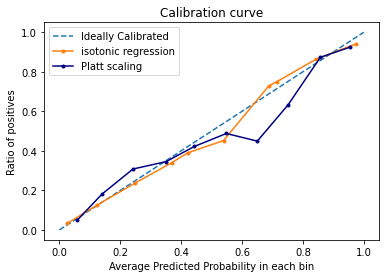

In [24]:
## YOUR CODE HERE
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibrationDisplay
cal_ir = CalibratedClassifierCV(best_xgb,cv="prefit",method="isotonic")
cal_ir.fit(bank_X_train, bank_y_train)
cal_ir_predict = cal_ir.predict_proba(bank_X_test)
cal_ir_true, cal_ir_prob = calibration_curve(bank_y_test, cal_ir_predict[:,1], n_bins=10)

cal_pl = CalibratedClassifierCV(best_xgb,cv="prefit",method="sigmoid")
cal_pl.fit(bank_X_train, bank_y_train)
cal_pl_predict = cal_pl.predict_proba(bank_X_test)
cal_pl_true, cal_pl_prob = calibration_curve(bank_y_test, cal_pl_predict[:,1], n_bins=10)

# CalibrationDisplay.from_estimator(cal_ir,bank_X_test,bank_y_test,n_bins=10,name="isotonic regression Calibrated XGB")
# CalibrationDisplay.from_estimator(cal_pl,bank_X_test,bank_y_test,n_bins=10,name="Platt scaling Calibrated XGB")
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
plt.plot(cal_ir_prob,cal_ir_true,marker = '.', label = 'isotonic regression')
plt.plot(cal_pl_prob,cal_pl_true,marker = '.', c= 'navy', label = 'Platt scaling')
plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.title("Calibration curve")
plt.show()


**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [25]:
## YOUR CODE HERE
print(f"The brier score for isotnic regression is: {brier_score_loss(bank_y_test,cal_ir.predict(bank_X_test))}")
print(f"The brier score for Platt scaling regression is: {brier_score_loss(bank_y_test,cal_pl.predict(bank_X_test))}")
print("THe calibration methods are not helping in having better predicted probabilities.")

The brier score for isotnic regression is: 0.13696969696969696
The brier score for Platt scaling regression is: 0.13575757575757577
THe calibration methods are not helping in having better predicted probabilities.
